In [42]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [43]:
df =pd.read_csv("/content/BostonHousing.csv")
df #Viewing the dataframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [44]:
df.isnull().sum() #Checking for null values


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [45]:
df[np.isnan(df['rm'])] #Viewing the null columns
null_columns = df[np.isnan(df['rm'])].index  #storing the null indexes
null_columns

Index([10, 35, 63, 96, 135], dtype='int64')

/tmp/ipython-input-46-3656110189.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rm']) #Can be replaced with mean


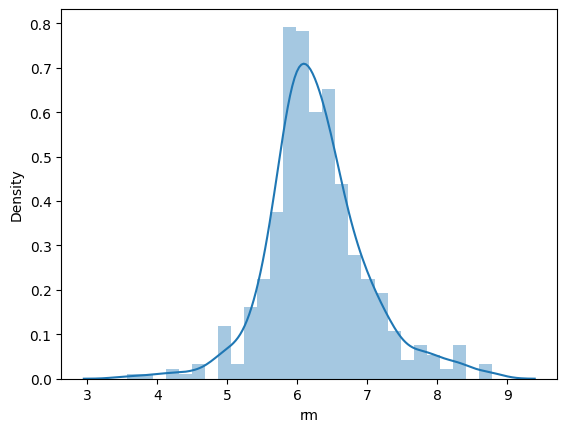

In [46]:
sns.distplot(df['rm']) #Can be replaced with mean
plt.show()

In [47]:
print(df['rm'].mean()) # Mean of rm
df['rm'].fillna(df['rm'].mean(),inplace=True) #Replacing the mean values
df.iloc[null_columns] # Viewing the previous null columns again to check whether any error occured

/tmp/ipython-input-47-2265121296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(),inplace=True) #Replacing the mean values


6.28434131736527


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
10,0.22489,12.5,7.87,0,0.524,6.284341,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,6.284341,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,6.284341,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,6.284341,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,6.284341,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [48]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [49]:
#Analysing the data with seaborn
df_corr = df.corr() #correlation

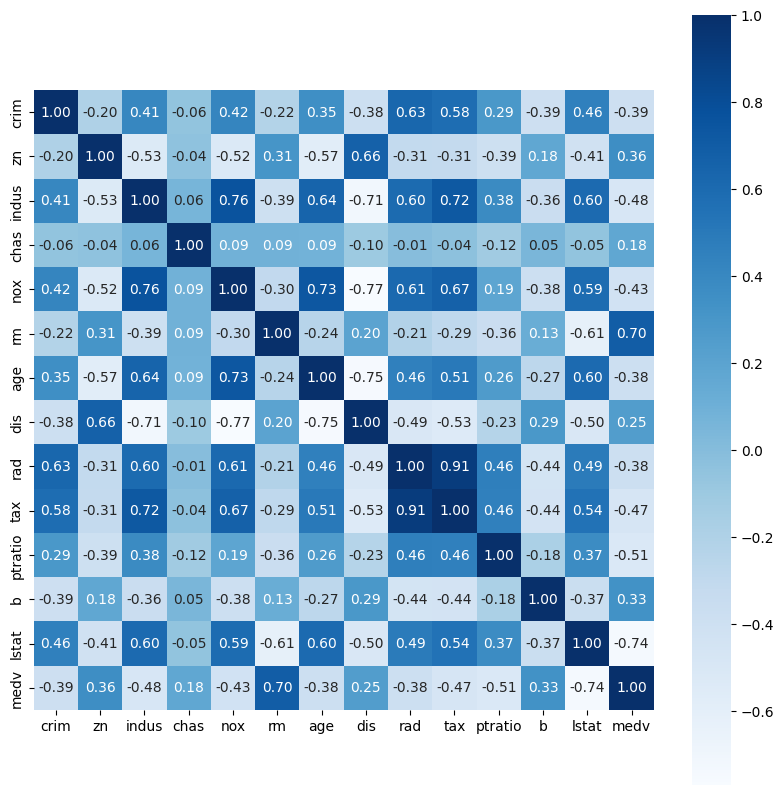

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='Blues',fmt='.2f',square=True)
plt.show()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


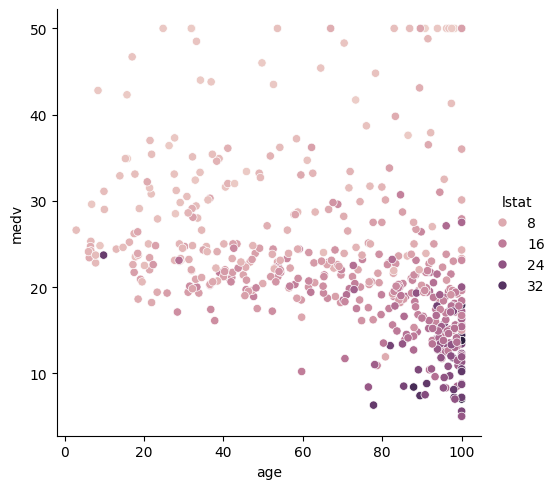

In [51]:
print(df.columns)
sns.relplot(x='age',y='medv',hue='lstat',data=df)
plt.show()

In [52]:
#Splitting the data
X=df.drop('medv',axis=1)
Y = df['medv']

#Splitting the data into X_train, X_test,Y_train, Y_test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

#Creating Model
model = XGBRegressor()
model.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
#Evaluating the model
Y_train_prediction = model.predict(X_train)
Y_test_prediction = model.predict(X_test)
train_comparison = pd.DataFrame({'Y_train' : Y_train,'Y_train_prediction' : Y_train_prediction})
test_comparison = pd.DataFrame({'Y_test' : Y_test,'Y_test_prediction' : Y_test_prediction})
train_comparison['error'] = train_comparison['Y_train'] - train_comparison['Y_train_prediction']
test_comparison['error'] = test_comparison['Y_test'] - test_comparison['Y_test_prediction']
train_comparison['abs_error'] = abs(train_comparison['error'])
test_comparison['abs_error'] = abs(test_comparison['error'])
train_comparison['square_error'] = np.square(train_comparison['error'])
test_comparison['square_error'] = np.square(test_comparison['error'])
print(train_comparison.head(20))
print('MAE : ',train_comparison['abs_error'].mean())
print('MSE : ',train_comparison['square_error'].mean())
print('RMSE : ',np.sqrt(train_comparison['square_error'].mean()))
print('R2 Error',metrics.r2_score(Y_train,Y_train_prediction))
print('MAE Using metrics : ',metrics.mean_absolute_error(Y_train,Y_train_prediction))
print(test_comparison)
print('MAE : ',test_comparison['abs_error'].mean())
print('MSE : ',test_comparison['square_error'].mean())
print('RMSE : ',np.sqrt(test_comparison['square_error'].mean()))
print('R_2 Error : ',metrics.r2_score(Y_test,Y_test_prediction))
print('MAE Using metrics : ',metrics.mean_absolute_error(Y_test,Y_test_prediction))


     Y_train  Y_train_prediction     error  abs_error  square_error
454     14.9           14.897551  0.002449   0.002449  5.999644e-06
471     19.6           19.646654 -0.046654   0.046654  2.176608e-03
281     35.4           35.402798 -0.002798   0.002798  7.827120e-06
477     12.0           12.006010 -0.006010   0.006010  3.612077e-05
107     20.4           20.400377 -0.000377   0.000377  1.423353e-07
214     23.7           23.710020 -0.010020   0.010020  1.004017e-04
319     21.0           21.017040 -0.017040   0.017040  2.903702e-04
186     50.0           49.995285  0.004715   0.004715  2.223090e-05
409     27.5           27.497952  0.002048   0.002048  4.196321e-06
394     12.7           12.609020  0.090980   0.090980  8.277318e-03
136     17.4           17.403105 -0.003105   0.003105  9.639672e-06
314     23.8           23.821365 -0.021365   0.021365  4.564785e-04
83      22.9           22.895386  0.004614   0.004614  2.129138e-05
323     18.5           18.500484 -0.000484   0.0

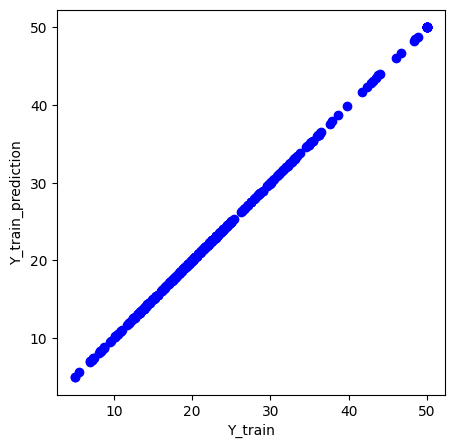

In [54]:
#Plotting results
plt.figure(figsize=(5,5))
plt.scatter(Y_train,Y_train_prediction,color='blue')
plt.xlabel('Y_train')
plt.ylabel('Y_train_prediction')
plt.show()

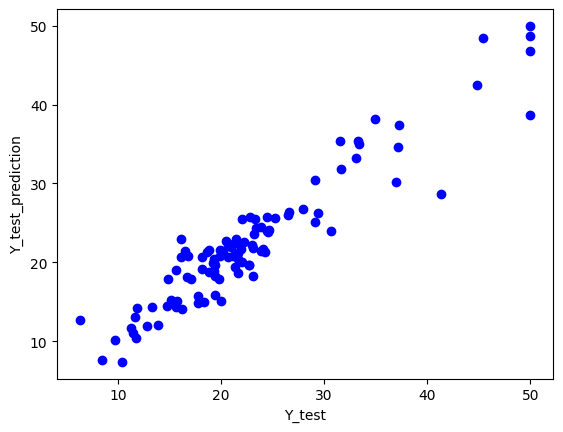

In [55]:
# plt.figure(figsize=(5,5))
plt.scatter(Y_test,Y_test_prediction,color='blue')
plt.xlabel('Y_test')
plt.ylabel('Y_test_prediction')
plt.show()